# Disney Investment Analysis

https://en.wikipedia.org/wiki/The_Walt_Disney_Company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbols = ['DIS', '^GSPC']
start = '1962-01-02'
end = '2024-02-29'

In [3]:
df = yf.download(symbols, start, end)['Adj Close']
df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,DIS,^GSPC
Date,,
1962-01-02,0.058209,70.959999
1962-01-03,0.058990,71.129997
1962-01-04,0.058990,70.639999
1962-01-05,0.059185,69.660004
1962-01-08,0.058990,69.120003


In [4]:
df.tail()

Ticker,DIS,^GSPC
Date,,
2024-02-22,107.639999,5087.029785
2024-02-23,107.739998,5088.799805
2024-02-26,107.680000,5069.529785
2024-02-27,109.419998,5078.180176
2024-02-28,110.800003,5069.759766


In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
62 years


In [6]:
# Calculate the number of months
num_months = delta.years * 12 + delta.months

print('How many months of investing?')
print('%s months' % num_months)

How many months of investing?
745 months


In [7]:
total_days = delta.years * 365 + delta.months * 30 + delta.days
print("Total number of days for investing:", total_days)

Total number of days for investing: 22687


In [8]:
print('How many days of investing?')
print('%s years, %s months, %s days' % (delta.years, delta.months, delta.days))

How many days of investing?
62 years, 1 months, 27 days


In [9]:
# Summary statistics
print(df.describe())

Ticker           DIS         ^GSPC
count   15646.000000  15646.000000
mean       27.072825    937.972991
std        40.679609   1102.029931
min         0.033908     52.320000
25%         0.686777    104.052502
50%         9.630704    438.855011
75%        28.277139   1321.059998
max       201.254089   5088.799805


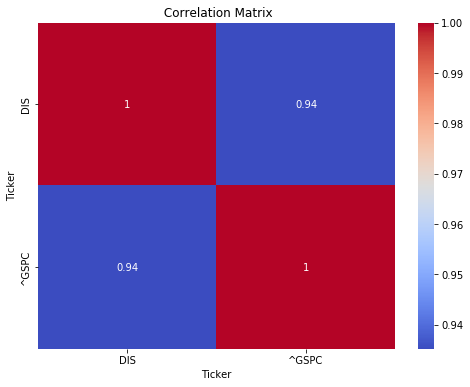

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(' Correlation Matrix')
plt.show()

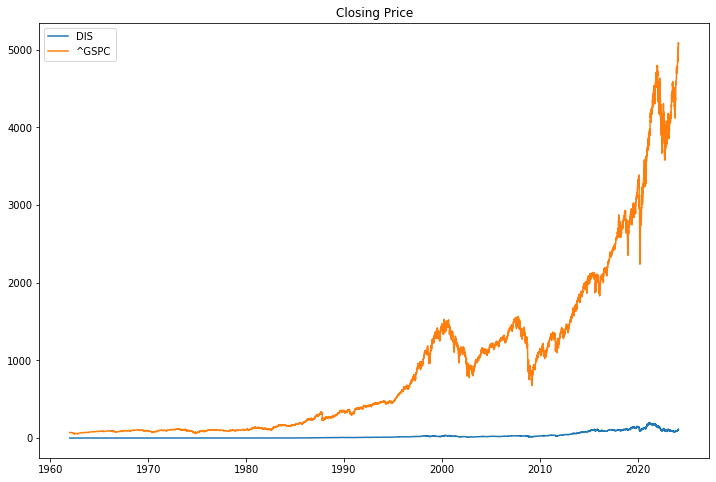

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Closing Price')
plt.legend(labels=df.columns)

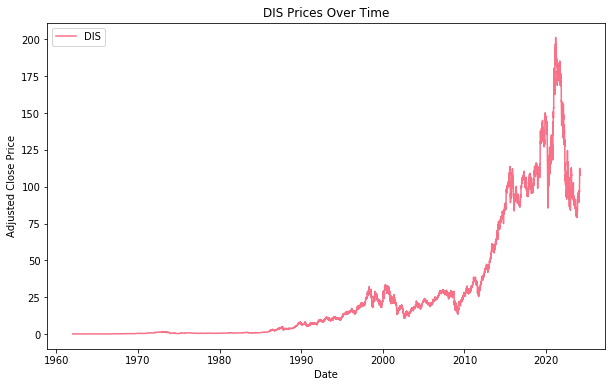

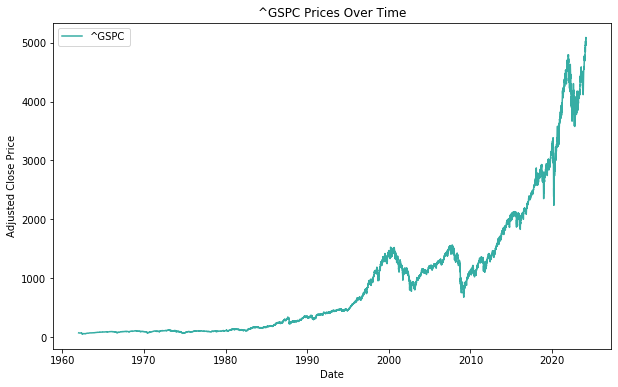

In [12]:
# Define a list of colors for each symbol
colors = sns.color_palette('husl', n_colors=len(symbols))

for i, s in enumerate(symbols):
    
    # Plot the stock prices with the specified color
    plt.figure(figsize=(10, 6)) 
    plt.plot(df.index, df[s], label=s, color=colors[i])
    plt.title(s + " Prices Over Time")
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend(loc='upper left')
    plt.show()

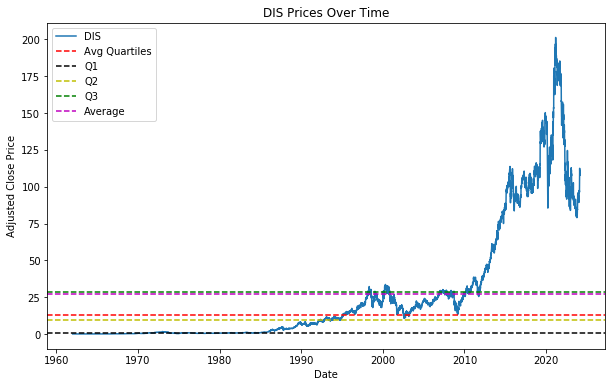

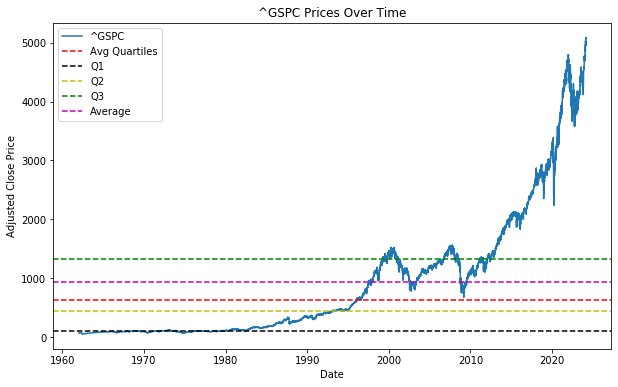

In [13]:
for symbol in symbols:
    q1 = df[symbol].quantile(0.25)
    q2 = df[symbol].median()
    q3 = df[symbol].quantile(0.75)
    average_quartiles = (q1 + q2 + q3) / 3
    average = df[symbol].mean()
    plt.figure(figsize=(10, 6)) 
    plt.plot(df.index, df[symbol], label=symbol)
    plt.title(symbol + " Prices Over Time")
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    
    # Mark quartile averages on the plot
    plt.axhline(y=average_quartiles, color='r', linestyle='--', label='Avg Quartiles')
    plt.axhline(y=q1, color='k', linestyle='--', label='Q1')
    plt.axhline(y=q2, color='y', linestyle='--', label='Q2')
    plt.axhline(y=q3, color='g', linestyle='--', label='Q3')
    plt.axhline(y=average, color='m', linestyle='--', label='Average')
    plt.legend(loc='best')
    plt.show()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

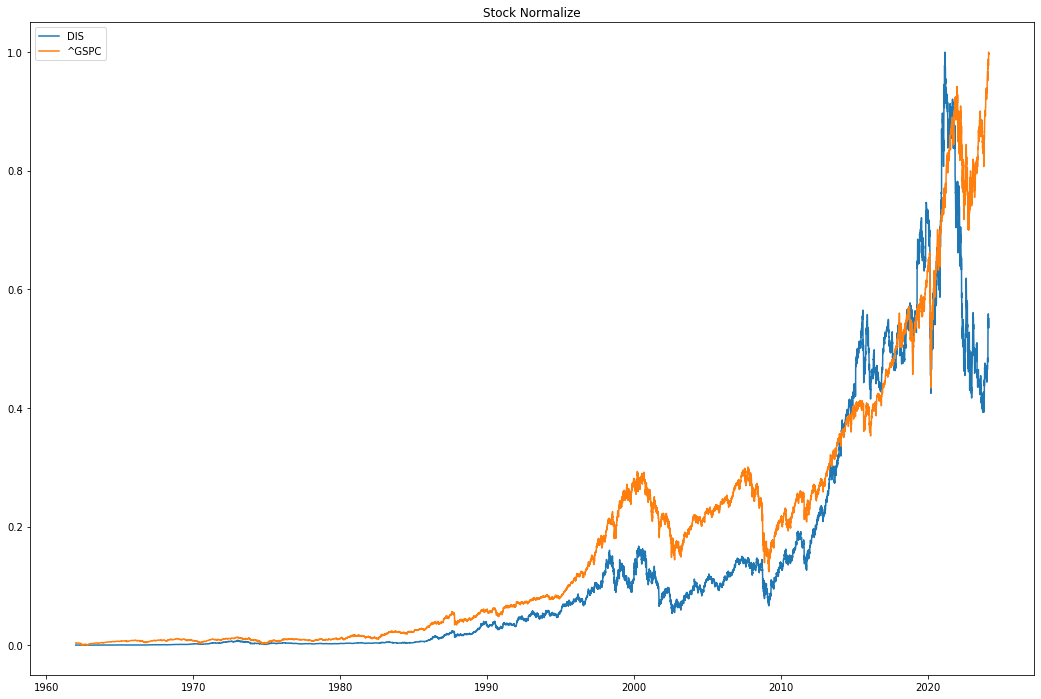

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Stock Normalize')
plt.legend(labels=normalize.columns)

In [16]:
symbols = sorted(symbols)
print(symbols)

df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

stock_rets = df.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


['DIS', '^GSPC']


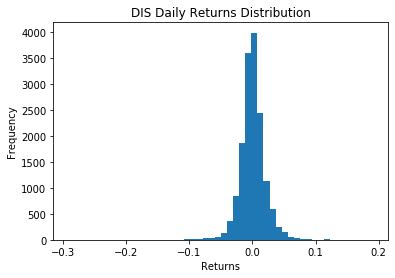

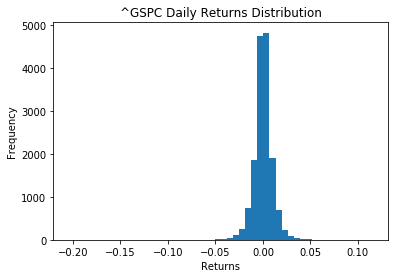

In [17]:
# Plot Histogram
for symbol in stock_rets:
    # Assuming stock_rets is a dictionary with symbols as keys and daily returns as values
    returns_data = stock_rets[symbol]
    
    # Plot histogram for each symbol
    plt.hist(returns_data, bins=50)
    
    # Set chart title and labels
    plt.title(symbol + ' Daily Returns Distribution')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    
    # Show the chart
    plt.show()

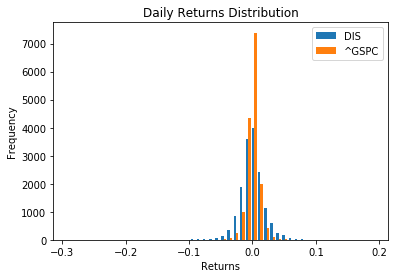

In [18]:
# Initialize an empty list to store all returns data
all_returns_data = []

# Collect returns data for all symbols
for symbol in stock_rets:
    all_returns_data.append(stock_rets[symbol])

# Plot histogram for all symbols on the same chart
plt.hist(all_returns_data, bins=50, label=stock_rets.keys())

# Set chart title and labels
plt.title('Daily Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the chart
plt.show()

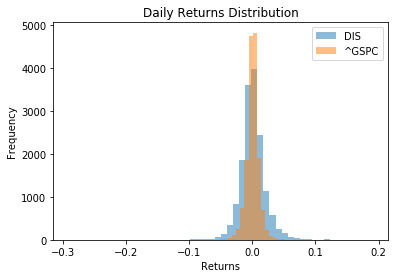

In [19]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Iterate through each symbol
for symbol in stock_rets:
    # Assuming stock_rets is a dictionary with symbols as keys and daily returns as values
    returns_data = stock_rets[symbol]
    
    # Plot histogram for each symbol on the same axis
    ax.hist(returns_data, bins=50, alpha=0.5, label=symbol)

# Set chart title and labels
ax.set_title('Daily Returns Distribution')
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend()

# Show the chart
plt.show()

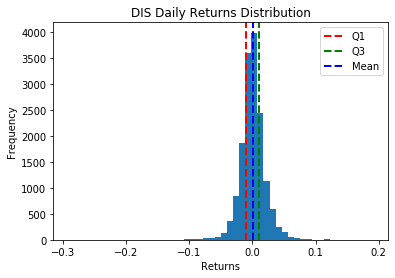

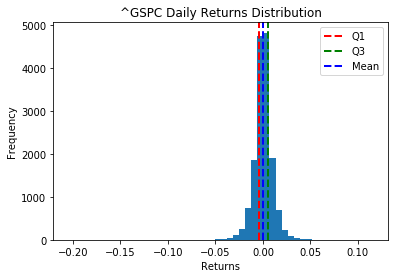

In [20]:
for symbol in stock_rets:
    # Assuming stock_rets is a dictionary with symbols as keys and daily returns as values
    returns_data = stock_rets[symbol]
    
    # Calculate Q1, Q3, and mean returns
    q1 = np.percentile(returns_data, 25)
    q3 = np.percentile(returns_data, 75)
    mean_return = np.mean(returns_data)
    
    # Plot histogram for each symbol
    plt.hist(returns_data, bins=50)
    
    # Set chart title and labels
    plt.title(symbol + ' Daily Returns Distribution')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    
    # Display Q1, Q3, and mean returns on the plot
    plt.axvline(q1, color='r', linestyle='dashed', linewidth=2, label='Q1')
    plt.axvline(q3, color='g', linestyle='dashed', linewidth=2, label='Q3')
    plt.axvline(mean_return, color='b', linestyle='dashed', linewidth=2, label='Mean')
    
    # Show legend
    plt.legend()
    
    # Show the chart
    plt.show()

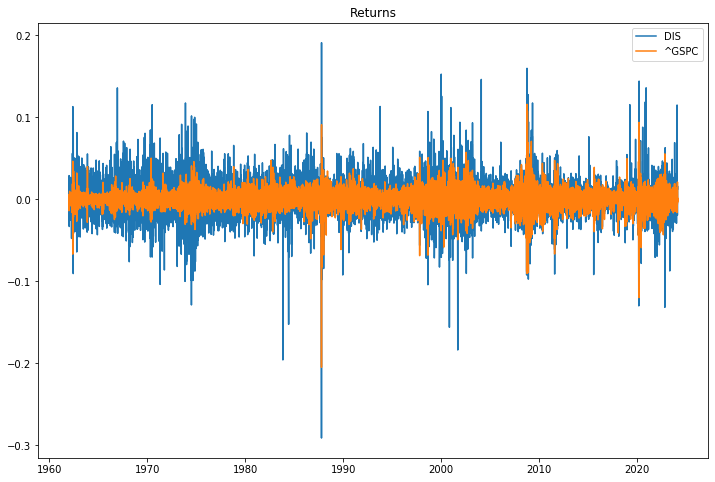

In [21]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Returns')
plt.legend(labels=stock_rets.columns)

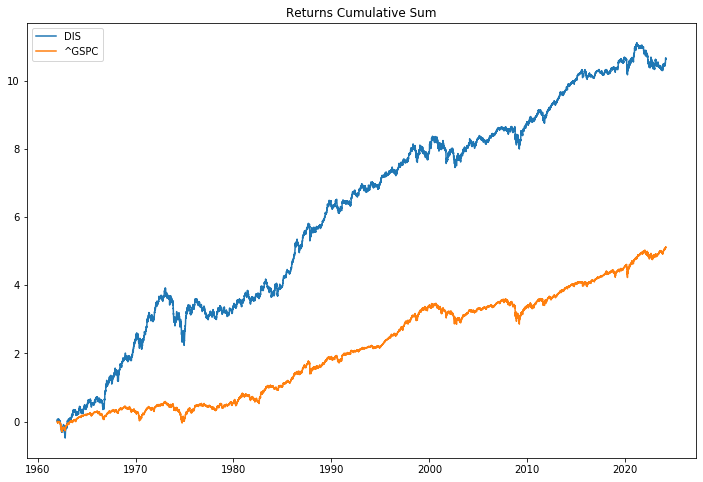

In [22]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

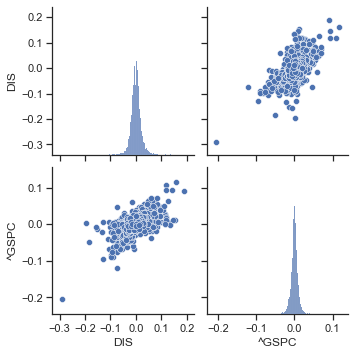

In [23]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

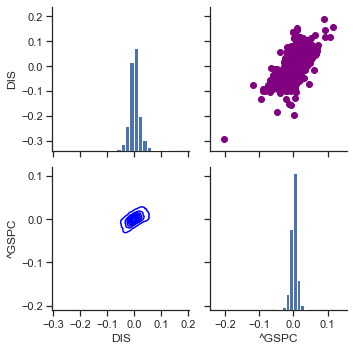

In [24]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

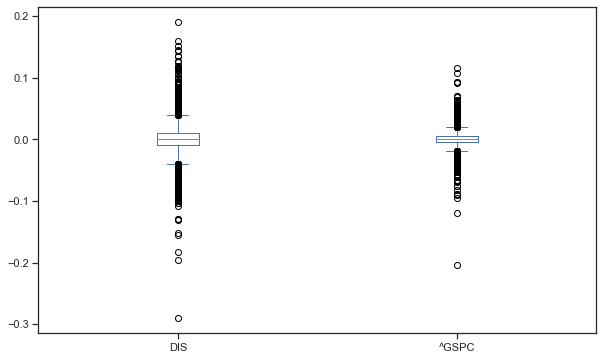

In [25]:
# Box plot
stock_rets.plot(kind='box',figsize=(10,6))

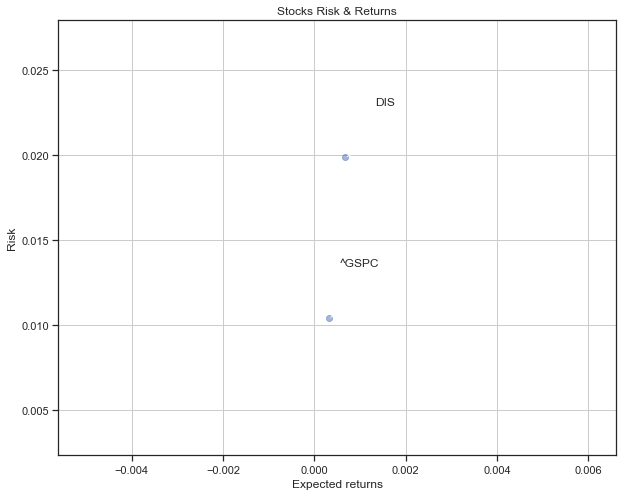

In [26]:
rets = stock_rets.dropna()

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

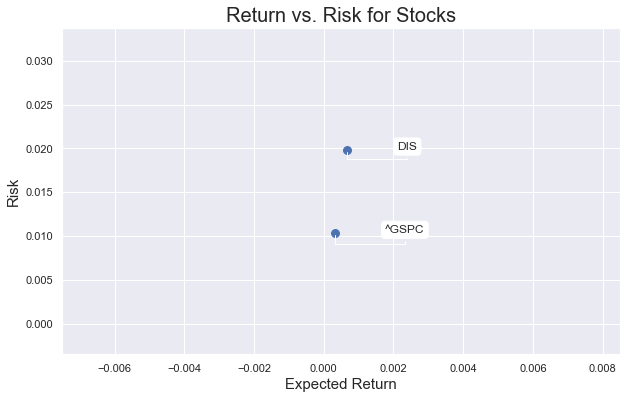

In [27]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [28]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
DIS      0.000681
^GSPC    0.000327
dtype: float64
--------------------------------------------------
Stock risks:
DIS      0.019871
^GSPC    0.010379
dtype: float64


In [29]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
^GSPC,0.000327,0.010379
DIS,0.000681,0.019871


In [30]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table['Trading Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk'] * np.sqrt(252)
table

,Returns,Risk,Sharpe Ratio,Trading Sharpe Ratio
DIS,0.000681,0.019871,-0.468989,-7.444977
^GSPC,0.000327,0.010379,-0.931988,-14.794850


In [31]:
table['Max Returns'] = rets.max()
table['Min Returns'] = rets.min()
table['Median Returns'] = rets.median()
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return

In [32]:
number_of_years = delta.years
days = (df.index[-1] - df.index[0]).days
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Trading Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
DIS,0.000681,0.019871,-0.468989,-7.444977,0.190955,-0.290944,0.000000,1.261200,0.000202,0.087437
^GSPC,0.000327,0.010379,-0.931988,-14.794850,0.115800,-0.204669,0.000442,-0.165816,-0.000027,0.048527


In [33]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for each asset's returns
table['Skewness'] = rets.apply(skew)
table['Kurtosis'] = rets.apply(kurtosis)

In [34]:
table.T

,DIS,^GSPC
Returns,0.000681,0.000327
Risk,0.019871,0.010379
Sharpe Ratio,-0.468989,-0.931988
Trading Sharpe Ratio,-7.444977,-14.794850
Max Returns,0.190955,0.115800
Min Returns,-0.290944,-0.204669
Median Returns,0.000000,0.000442
Total Return,1.261200,-0.165816
Average Return Yearly,0.000202,-0.000027
CAGR,0.087437,0.048527


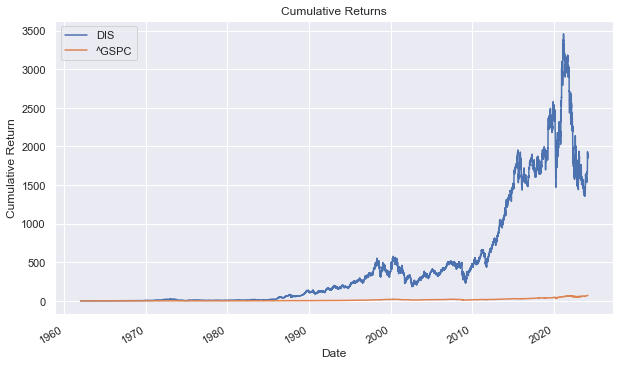

Disney outperformed the S&P 500 by 183204.95%


In [35]:
# Calculate cumulative returns
cumulative_returns = df / df.iloc[0]
dis_cumulative_return = cumulative_returns['DIS'][-1]
sp500_cumulative_return = cumulative_returns['^GSPC'][-1]

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()

# Check if Disney outperformed or underperformed the market
if dis_cumulative_return > sp500_cumulative_return:
    outperformance = (dis_cumulative_return - sp500_cumulative_return) * 100
    print("Disney outperformed the S&P 500 by {:.2f}%".format(outperformance))
else:
    underperformance = (sp500_cumulative_return - dis_cumulative_return) * 100
    print("Disney underperformed the S&P 500 by {:.2f}%".format(underperformance))

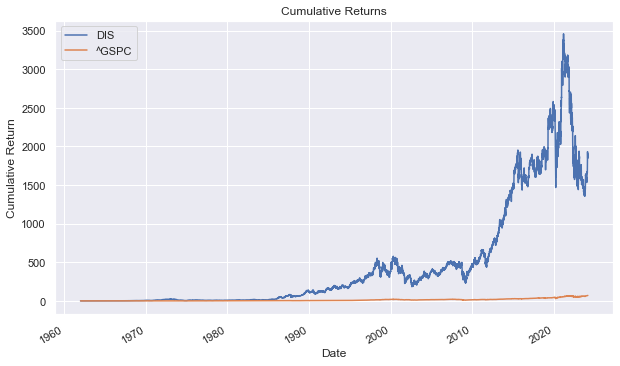

Disney outperformed the S&P 500.
Outperformance Percentage: 2564.27%


In [36]:
# Calculate returns
returns = df.pct_change()

# Calculate cumulative returns
cumulative_returns = (returns + 1).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Calculate outperformance
dis_cumulative_return = cumulative_returns['DIS'].iloc[-1]
sp500_cumulative_return = cumulative_returns['^GSPC'].iloc[-1]

if dis_cumulative_return > sp500_cumulative_return:
    print("Disney outperformed the S&P 500.")
    outperformance_percentage = ((dis_cumulative_return - sp500_cumulative_return) / sp500_cumulative_return) * 100
    print("Outperformance Percentage: {:.2f}%".format(outperformance_percentage))
else:
    print("Disney underperformed the S&P 500.")
    underperformance_percentage = ((sp500_cumulative_return - dis_cumulative_return) / sp500_cumulative_return) * 100
    print("Underperformance Percentage: {:.2f}%".format(underperformance_percentage))

<Figure size 720x432 with 0 Axes>

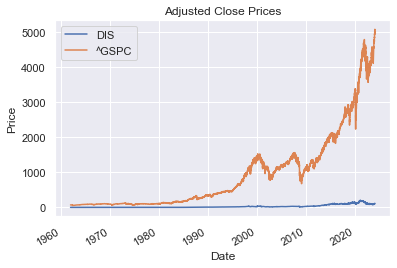

Percentage change for Disney (DIS): 190249.48%
Percentage change for S&P 500 (^GSPC): 7044.53%
Disney outperformed the S&P 500.


In [37]:
# Calculate percentage change
percentage_change_dis = (df['DIS'].iloc[-1] - df['DIS'].iloc[0]) / df['DIS'].iloc[0] * 100
percentage_change_sp500 = (df['^GSPC'].iloc[-1] - df['^GSPC'].iloc[0]) / df['^GSPC'].iloc[0] * 100

# Plot adjusted close prices
plt.figure(figsize=(10, 6))
df.plot()
plt.title('Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Print percentage change and performance comparison
print("Percentage change for Disney (DIS): {:.2f}%".format(percentage_change_dis))
print("Percentage change for S&P 500 (^GSPC): {:.2f}%".format(percentage_change_sp500))

if percentage_change_dis > percentage_change_sp500:
    print("Disney outperformed the S&P 500.")
elif percentage_change_dis < percentage_change_sp500:
    print("Disney underperformed the S&P 500.")
else:
    print("Disney performed in line with the S&P 500.")